<a href="https://colab.research.google.com/github/shlsharma/Data-Science/blob/main/t_SNE_on_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Data Science/train.csv')

In [5]:
# TSNE
from sklearn.manifold import TSNE

# picking the top 1000 points as TSNE take times for 15k points
data_1000 = df[:1000]

In [7]:
label = data_1000['label']
data_1000 = data_1000.drop(columns=['label'])

In [9]:
from sklearn.preprocessing import StandardScaler

standarized_data = StandardScaler().fit_transform(data_1000)

In [29]:
model = TSNE(n_components=2, random_state=0, perplexity=60, n_iter=1000)
tsne_data = model.fit_transform(standarized_data)

In [30]:
tsne_data = np.vstack((tsne_data.T, label)).T

(1000, 3)


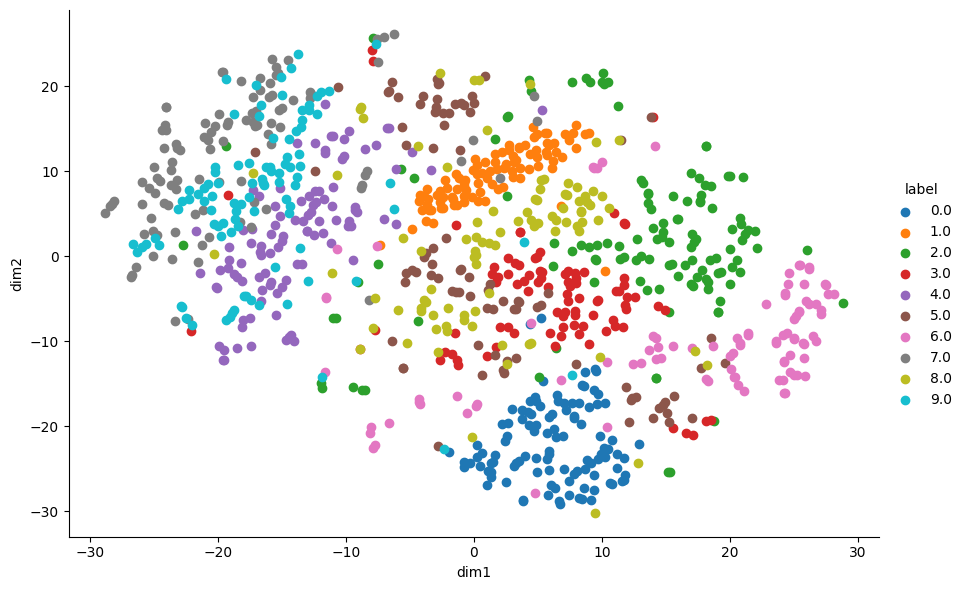

In [34]:
#tsne_data = np.vstack((tsne_data.T, label)).T
tsne_df = pd.DataFrame(tsne_data, columns=['dim1', 'dim2', 'label'])
sns.FacetGrid(data=tsne_df, hue='label', height=6, aspect=1.5).map(plt.scatter, 'dim1', 'dim2').add_legend()